# KMeans

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean 
 of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from , although they live in the same space.
   
   
K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose  samples from the dataset . After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.



The algorithm can also be understood through the concept of Voronoi diagrams. First the Voronoi diagram of the points is calculated using the current centroids. Each segment in the Voronoi diagram becomes a separate cluster. Secondly, the centroids are updated to the mean of each segment. The algorithm then repeats this until a stopping criterion is fulfilled. Usually, the algorithm stops when the relative decrease in the objective function between iterations is less than the given tolerance value. This is not the case in this implementation: iteration stops when centroids move less than the tolerance.
https://scikit-learn.org/stable/modules/clustering.html#k-means

Automatically created module for IPython interactive environment
number of estimated clusters : 3


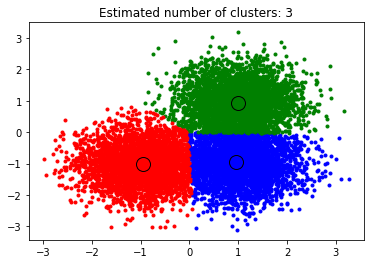

In [4]:
print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Cluster the EPA Data Set 

In [26]:
epa = pd.read_csv('https://raw.githubusercontent.com/sqlshep/SQLShepBlog/master/data/epaMpg.csv')

#Drop the row number
epa = epa.drop(epa.columns[[0]], axis=1)

#replace the "." in the column names with "_"
epa.columns = epa.columns.str.replace('.', '_')

# Drop useless columns
epa = epa.drop(epa.columns[[0,1,2]], axis=1)
epa = epa.drop(epa.columns[[3,9,11]], axis=1)

epa['Tested_Transmission_Type_Code']= epa['Tested_Transmission_Type_Code'].astype('category')    
epa['Drive_System_Code']= epa['Drive_System_Code'].astype('category')

#One hot encode categories
epa = pd.get_dummies(epa)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  import sys


In [27]:
epa

,HorsePower,Cylinders,Gears,Weight,AxleRatio,Test_Procedure_Cd,Test_Fuel_Type_Cd,FuelEcon,Tested_Transmission_Type_Code_A,Tested_Transmission_Type_Code_AM,Tested_Transmission_Type_Code_AMS,Tested_Transmission_Type_Code_CVT,Tested_Transmission_Type_Code_M,Tested_Transmission_Type_Code_SA,Tested_Transmission_Type_Code_SCV,Drive_System_Code_4,Drive_System_Code_A,Drive_System_Code_F,Drive_System_Code_P,Drive_System_Code_R
0,552,12,8,4750,2.73,21,61,17.3,0,0,0,0,0,1,0,0,0,0,0,1
1,568,12,8,4500,2.73,21,61,16.5,0,0,0,0,0,1,0,0,0,0,0,1
2,616,12,8,6000,2.85,90,61,17.4,0,0,0,0,0,1,0,0,0,1,0,0
3,616,12,8,6000,2.85,11,27,13.6,0,0,0,0,0,1,0,0,0,1,0,0
4,248,4,8,4000,2.81,3,61,45.8,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,313,4,8,5000,3.33,21,61,33.1,0,0,0,0,0,1,0,0,1,0,0,0
1030,250,4,8,5000,3.33,31,61,27.4,0,0,0,0,0,1,0,0,0,1,0,0
1031,250,4,8,4750,3.33,31,61,28.6,0,0,0,0,0,1,0,0,0,1,0,0
1032,316,4,8,5000,3.33,3,61,37.9,0,0,0,0,0,1,0,0,0,1,0,0


In [61]:
kmeans = KMeans(n_clusters=10).fit(epa)

In [62]:
epa_clusters = epa
epa_clusters['Clusters'] = kmeans.predict(epa)


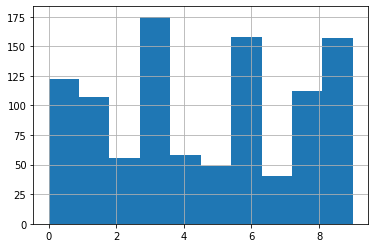

In [66]:
epa_clusters['Clusters'].hist(bins=10)

In [35]:
epa_clusters.loc[epa_clusters['Clusters'] == 1]

,HorsePower,Cylinders,Gears,Weight,AxleRatio,Test_Procedure_Cd,Test_Fuel_Type_Cd,FuelEcon,Tested_Transmission_Type_Code_A,Tested_Transmission_Type_Code_AM,...,Tested_Transmission_Type_Code_CVT,Tested_Transmission_Type_Code_M,Tested_Transmission_Type_Code_SA,Tested_Transmission_Type_Code_SCV,Drive_System_Code_4,Drive_System_Code_A,Drive_System_Code_F,Drive_System_Code_P,Drive_System_Code_R,Clusters
0,552,12,8,4750,2.73,21,61,17.3,0,0,...,0,0,1,0,0,0,0,0,1,1
36,322,6,8,4750,2.81,31,61,26.5,0,0,...,0,0,1,0,0,0,0,0,1,1
41,180,4,8,4750,3.23,3,61,43.9,0,0,...,0,0,1,0,0,0,0,0,1,1
48,300,6,8,4750,3.23,31,61,24.7,0,0,...,0,0,1,0,0,0,0,0,1,1
49,300,6,8,4750,3.23,31,61,25.4,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,313,4,8,5000,3.20,3,61,48.2,0,0,...,0,0,1,0,0,1,0,0,0,1
1029,313,4,8,5000,3.33,21,61,33.1,0,0,...,0,0,1,0,0,1,0,0,0,1
1030,250,4,8,5000,3.33,31,61,27.4,0,0,...,0,0,1,0,0,0,1,0,0,1
1031,250,4,8,4750,3.33,31,61,28.6,0,0,...,0,0,1,0,0,0,1,0,0,1


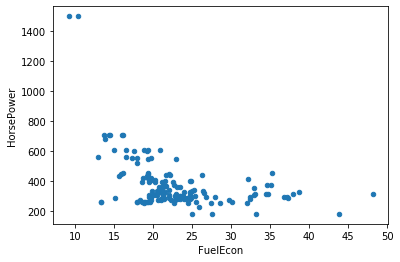

In [53]:
cluster_1 = epa_clusters.loc[epa_clusters['Clusters'] == 1]
cluster_1.plot.scatter(x='FuelEcon', y='HorsePower')

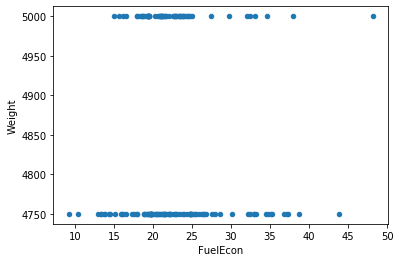

In [54]:
cluster_1 = epa_clusters.loc[epa_clusters['Clusters'] == 1]
cluster_1.plot.scatter(x='FuelEcon', y='Weight')

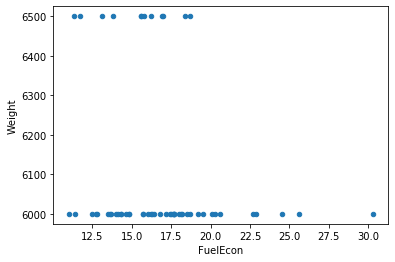

In [56]:
cluster_2 = epa_clusters.loc[epa_clusters['Clusters'] == 2]
cluster_2.plot.scatter(x='FuelEcon', y='Weight')

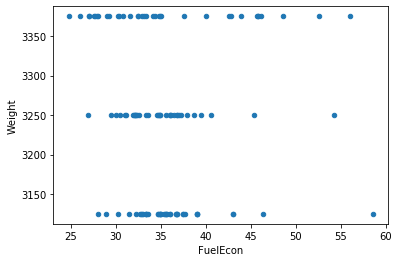

In [57]:
cluster_3 = epa_clusters.loc[epa_clusters['Clusters'] == 3]
cluster_3.plot.scatter(x='FuelEcon', y='Weight')

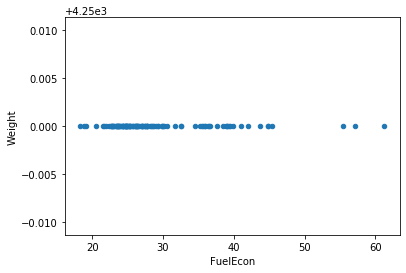

In [58]:
cluster_4 = epa_clusters.loc[epa_clusters['Clusters'] == 4]
cluster_4.plot.scatter(x='FuelEcon', y='Weight')

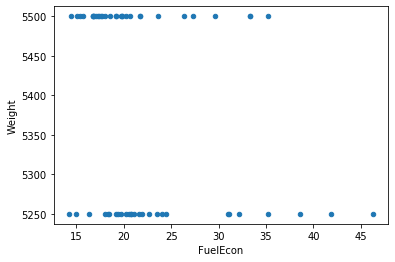

In [59]:
cluster_5 = epa_clusters.loc[epa_clusters['Clusters'] == 5]
cluster_5.plot.scatter(x='FuelEcon', y='Weight')

In [60]:
cluster_5

,HorsePower,Cylinders,Gears,Weight,AxleRatio,Test_Procedure_Cd,Test_Fuel_Type_Cd,FuelEcon,Tested_Transmission_Type_Code_A,Tested_Transmission_Type_Code_AM,...,Tested_Transmission_Type_Code_CVT,Tested_Transmission_Type_Code_M,Tested_Transmission_Type_Code_SA,Tested_Transmission_Type_Code_SCV,Drive_System_Code_4,Drive_System_Code_A,Drive_System_Code_F,Drive_System_Code_P,Drive_System_Code_R,Clusters
74,601,12,8,5500,2.81,31,61,16.7,0,0,...,0,0,1,0,0,1,0,0,0,5
78,567,8,8,5500,3.15,31,61,18.0,0,0,...,0,0,1,0,0,1,0,0,0,5
80,255,6,8,5250,3.15,3,19,41.9,0,0,...,0,0,1,0,0,0,0,0,1,5
82,240,4,8,5500,3.15,90,61,23.6,0,0,...,0,0,1,0,0,0,0,0,1,5
83,443,8,8,5500,3.15,21,61,17.7,0,0,...,0,0,1,0,0,0,0,0,1,5
84,443,8,8,5500,3.15,31,61,19.8,0,0,...,0,0,1,0,0,0,0,0,1,5
86,443,8,8,5500,3.15,3,61,27.3,0,0,...,0,0,1,0,0,0,0,0,1,5
88,443,8,8,5500,3.15,31,61,19.7,0,0,...,0,0,1,0,0,0,0,0,1,5
135,287,6,1,5250,3.59,11,26,22.7,0,0,...,1,0,0,0,0,0,1,0,0,5
136,287,6,1,5250,3.59,21,61,46.3,0,0,...,1,0,0,0,0,0,1,0,0,5
